<a href="https://colab.research.google.com/github/rkvarmaa460-cpu/Upgrad/blob/main/Beer_Production_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the three csv files
states=pd.read_csv('/content/beer_states.csv')
brewers=pd.read_csv('/content/brewer_size.csv')
materials=pd.read_csv('/content/brewing_materials.csv')

In [ ]:
# Take a look at the dataframes and understand the structure
states.shape

(1872, 4)

In [ ]:
# Take a look at the dataframes and understand the structure
brewers.shape

(137, 6)

In [ ]:
# Take a look at the dataframes and understand the structure
materials.shape

(1440, 9)

1 Data Cleaning

In [ ]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    1872 non-null   object 
 1   year     1872 non-null   int64  
 2   barrels  1853 non-null   float64
 3   type     1872 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 58.6+ KB


In [ ]:
states['barrels'].isnull().sum()

np.int64(19)

In [ ]:
states.drop(states[states['barrels'].isnull()].index, inplace=True)

In [ ]:
states['barrels'].isnull().sum()

np.int64(0)

In [ ]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1853 entries, 0 to 1871
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    1853 non-null   object 
 1   year     1853 non-null   int64  
 2   barrels  1853 non-null   float64
 3   type     1853 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 72.4+ KB


In [ ]:
states.to_csv('states.csv',index=False)
from google.colab import files
files.download('states.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
brewers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              137 non-null    int64  
 1   brewer_size       137 non-null    object 
 2   n_of_brewers      137 non-null    int64  
 3   total_barrels     136 non-null    float64
 4   taxable_removals  137 non-null    float64
 5   total_shipped     135 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 6.6+ KB


In [ ]:
brewers['total_shipped']

,total_shipped
0,3639970.0
1,14548.0
2,21563.0
3,128000.0
4,95732.0
...,...
132,7509.0
133,2296.0
134,NaN
135,185.0


In [ ]:
brewers['total_shipped'].fillna(0,inplace=True)

In [ ]:
brewers['total_shipped'].isnull().sum()

np.int64(0)

In [ ]:
brewers.to_csv('brewers.csv',index=False)
from google.colab import files
files.download('brewers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
materials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_type         1440 non-null   object 
 1   material_type     1440 non-null   object 
 2   year              1440 non-null   int64  
 3   month             1440 non-null   int64  
 4   type              1440 non-null   object 
 5   month_current     1440 non-null   int64  
 6   month_prior_year  1440 non-null   int64  
 7   ytd_current       1008 non-null   float64
 8   ytd_prior_year    1008 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 101.4+ KB


In [ ]:
materials['ytd_current'].isnull().sum()

np.int64(432)

In [ ]:
materials['ytd_current'].fillna(0,inplace=True)

In [ ]:
materials['ytd_current'].isnull().sum()

np.int64(0)

In [ ]:
materials['ytd_prior_year'].fillna(0,inplace=True)

In [ ]:
materials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_type         1440 non-null   object 
 1   material_type     1440 non-null   object 
 2   year              1440 non-null   int64  
 3   month             1440 non-null   int64  
 4   type              1440 non-null   object 
 5   month_current     1440 non-null   int64  
 6   month_prior_year  1440 non-null   int64  
 7   ytd_current       1440 non-null   float64
 8   ytd_prior_year    1440 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 101.4+ KB


In [ ]:
materials.to_csv('materials.csv',index=False)
from google.colab import files
files.download('materials.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
states_1=pd.read_csv('/content/states.csv')

In [ ]:
brewers_1=pd.read_csv('/content/brewers.csv')

In [ ]:
materials_1=pd.read_csv('/content/materials.csv')

Fixing Rows

In [ ]:
states_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    1853 non-null   object 
 1   year     1853 non-null   int64  
 2   barrels  1853 non-null   float64
 3   type     1853 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 58.0+ KB


In [ ]:
# Remove rows having totals below states
states_1.drop(states_1[states_1['state']=='total'].index,inplace=True)

In [ ]:
states_1.shape

(1817, 4)

In [ ]:
# Remove rows having totals
brewers_1.drop(brewers_1[brewers_1['brewer_size']=='Total'].index,inplace=True)
#

In [ ]:
brewers_1.shape

(126, 6)

In [ ]:
# Remove rows having totals
materials_1.drop(materials_1[materials_1['type']=='Other'].index,inplace=True)
#

1.3 Handling Missing Values¶

In [ ]:
# Find the proportion of missing values in each column states

In [ ]:
median_val= states_1.loc[states_1['barrels']!=0,'barrels'].median()


# Analyse the null values and decide what to do with them

In [ ]:
states_1['barrels']=states_1.loc[states_1['barrels']==0,'barrels']=median_val

materials

In [ ]:
# Find the percentage of missing values in each column

In [ ]:
missing_pct=materials_1.isna().mean()*100
missing_pct.sort_values(ascending=False)

,0
data_type,0.0
material_type,0.0
year,0.0
month,0.0
type,0.0
month_current,0.0
month_prior_year,0.0
ytd_current,0.0
ytd_prior_year,0.0


1.3.3 brewers

In [ ]:
# Percentage of missing values in columns

In [ ]:
miss_pct=brewers_1.isna().mean()*100
miss_pct.sort_values(ascending=False)

,0
total_barrels,0.793651
year,0.000000
brewer_size,0.000000
n_of_brewers,0.000000
taxable_removals,0.000000
total_shipped,0.000000


In [ ]:
# Analyse the missing values and decide what to do with them
# Should you impute with mean or median? Should you drop?


In [ ]:
median_v=brewers_1.loc[brewers_1['total_barrels']!=0,'total_barrels'].median()

In [ ]:
brewers_1['total_barrels']=brewers_1.loc[brewers_1['total_barrels']==0,'total_barrels']=median_v

In [ ]:
mis_pc=brewers_1.isna().mean()*100
mis_pc.sort_values(ascending=False)

,0
year,0.0
brewer_size,0.0
n_of_brewers,0.0
total_barrels,0.0
taxable_removals,0.0
total_shipped,0.0


1.4 Handling Outliers

In [ ]:
# Check if there are any outliers present states_1

In [ ]:
states_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1817.0,2013.542653,3.442970e+00,2008.00,2011.00,2014.00,2017.00,2019.00
barrels,1817.0,29126.650000,9.352179e-10,29126.65,29126.65,29126.65,29126.65,29126.65


In [ ]:
states_1.to_csv('states.csv')
from google.colab import files
files.download('states.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Check if there are any outliers present brewers_1

In [ ]:
brewers_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,126.0,2.014190e+03,3.186758e+00,2009.00,2011.250,2014.00,2017.000,2.019000e+03
n_of_brewers,126.0,3.329048e+02,8.057555e+02,3.00,14.250,41.00,144.250,4.577000e+03
total_barrels,126.0,2.518394e+06,4.675202e-10,2518394.31,2518394.310,2518394.31,2518394.310,2.518394e+06
taxable_removals,126.0,1.535661e+07,3.701901e+07,14711.36,1084831.387,2261441.80,6485478.155,1.596440e+08
total_shipped,126.0,4.742396e+05,1.272266e+06,0.00,4662.500,26526.50,107720.500,5.749122e+06


In [ ]:
brewers_1.to_csv('brewers.csv')
from google.colab import files
files.download('brewers.csv')
#

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
##Check if there are any outliers present material_1

In [ ]:
materials_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1320.0,2.012500e+03,2.873370e+00,2008.0,2010.00,2012.5,2.015000e+03,2.017000e+03
month,1320.0,6.500000e+00,3.453361e+00,1.0,3.75,6.5,9.250000e+00,1.200000e+01
month_current,1320.0,1.209694e+08,1.841915e+08,0.0,1711618.50,42602318.0,9.234131e+07,6.565965e+08
month_prior_year,1320.0,2.066807e+08,5.505508e+08,0.0,2565154.75,53829315.5,1.683233e+08,6.395439e+09
ytd_current,1320.0,7.050825e+08,1.390742e+09,0.0,0.00,49437720.5,6.104239e+08,7.046705e+09
ytd_prior_year,1320.0,7.159643e+08,1.412994e+09,0.0,0.00,46371613.0,6.234339e+08,7.143917e+09


In [ ]:
materials_1.to_csv('materials.csv')
from google.colab import files
files.download('materials.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Performing Analyses

In [ ]:
df1=pd.read_csv('/content/states (1).csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1817 non-null   int64  
 1   state       1817 non-null   object 
 2   year        1817 non-null   int64  
 3   barrels     1817 non-null   float64
 4   type        1817 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 71.1+ KB


In [ ]:
# Find the number of instances of each state in the data

In [ ]:
states_count=df1['state'].value_counts().reset_index()
states_count.columns=['state','count']
states_count



,state,count
0,AK,36
1,AR,36
2,AZ,36
3,IN,36
4,CA,36
5,CO,36
6,CT,36
7,DE,36
8,FL,36
9,GA,36


Multivariate

2.1.0 [3 marks]
Coming to multivariate analyses, let us first classify the variables into categorical and numerical. Write below the type of variable, whether numerical or categorical and ordered or unordered:

state:
year:
barrels:
type:

In [ ]:
# Find total beer production across all years, and the percentage share of each state in that

In [ ]:
total_production=df1['barrels'].sum()
total_production

np.float64(52923123.05000001)

In [ ]:
total_production_state=df1.groupby('state')['barrels'].sum().reset_index()
total_production_state

,state,barrels
0,AK,1048559.40
1,AL,961179.45
2,AR,1048559.40
3,AZ,1048559.40
4,CA,1048559.40
5,CO,1048559.40
6,CT,1048559.40
7,DC,961179.45
8,DE,1048559.40
9,FL,1048559.40


In [ ]:
total_production_state['percentage_share']=total_production_state['barrels']/total_production*100

In [ ]:
total_production_state.sort_values(by='percentage_share',ascending=False)


,state,barrels,percentage_share
0,AK,1048559.40,1.981288
2,AR,1048559.40,1.981288
3,AZ,1048559.40,1.981288
15,IN,1048559.40,1.981288
4,CA,1048559.40,1.981288
5,CO,1048559.40,1.981288
6,CT,1048559.40,1.981288
8,DE,1048559.40,1.981288
9,FL,1048559.40,1.981288
10,GA,1048559.40,1.981288


In [ ]:
# Find the average beer production per year for all states

In [ ]:
average_beer_production=df1.groupby('year')['barrels'].mean().reset_index()
average_beer_production

,year,barrels
0,2008,29126.65
1,2009,29126.65
2,2010,29126.65
3,2011,29126.65
4,2012,29126.65
5,2013,29126.65
6,2014,29126.65
7,2015,29126.65
8,2016,29126.65
9,2017,29126.65


In [ ]:
# Identify and visualise top 5 and bottom 5 states

In [ ]:
top_5_states=total_production_state.sort_values(by='barrels',ascending=False)
top_5_states.head(5)

,state,barrels,percentage_share
0,AK,1048559.4,1.981288
2,AR,1048559.4,1.981288
3,AZ,1048559.4,1.981288
15,IN,1048559.4,1.981288
4,CA,1048559.4,1.981288


In [ ]:
bottom_5_states=total_production_state.sort_values(by='barrels',ascending=True)
bottom_5_states.head(5)

,state,barrels,percentage_share
28,ND,757292.90,1.430930
1,AL,961179.45,1.816181
7,DC,961179.45,1.816181
41,SD,990306.10,1.871216
25,MS,1019432.75,1.926252


In [ ]:
final_val=pd.concat([top_5_states,bottom_5_states])
final_val

,state,barrels,percentage_share
0,AK,1048559.4,1.981288
2,AR,1048559.4,1.981288
3,AZ,1048559.4,1.981288
15,IN,1048559.4,1.981288
4,CA,1048559.4,1.981288
...,...,...,...
46,VT,1048559.4,1.981288
47,WA,1048559.4,1.981288
48,WI,1048559.4,1.981288
49,WV,1048559.4,1.981288


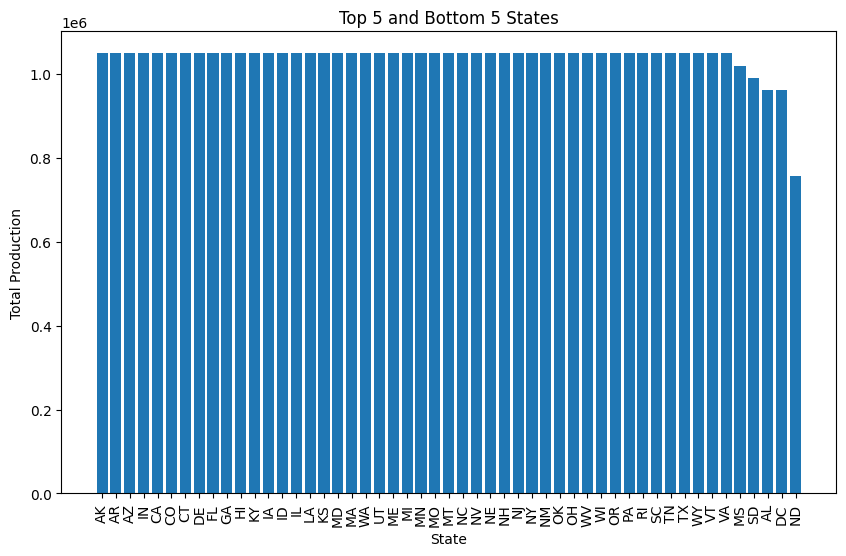

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(final_val['state'],final_val['barrels'])
plt.title('Top 5 and Bottom 5 States')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=90)
plt.show()
#

In [ ]:

##From the total production, visualise the proportion of the production type (kegs and barrels, bottles and cans etc.) Choose a suitable plot to show this information.

In [ ]:
# Visualise the proportions of kegs, bottles and on premises production

In [ ]:
type_production=df1.groupby('type')['barrels'].sum().reset_index()
type_production.sort_values(by='barrels',ascending=False)

,type,barrels
2,On Premises,17796383.15
1,Kegs and Barrels,17592496.60
0,Bottles and Cans,17534243.30


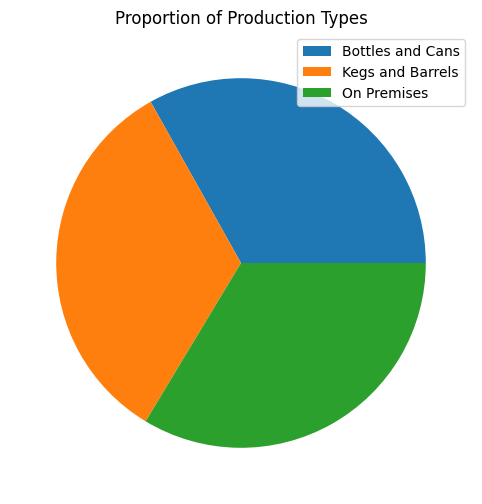

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(type_production['barrels'])
plt.legend(type_production['type'])
plt.title('Proportion of Production Types')
plt.show()
#

In [ ]:
##Get a description of mean, median, 1/4th and 3/4th quantiles etc for each production type. Compare the means of bottles/cans vs barrels/kegs vs on premises types.

In [ ]:
# Describe mean, quantile values

In [ ]:
type_stat=df1.groupby('type')['barrels'].describe().reset_index()
type_stat

,type,count,mean,std,min,25%,50%,75%,max
0,Bottles and Cans,602.0,29126.65,1.856912e-10,29126.65,29126.65,29126.65,29126.65,29126.65
1,Kegs and Barrels,604.0,29126.65,1.784087e-10,29126.65,29126.65,29126.65,29126.65,29126.65
2,On Premises,611.0,29126.65,1.602022e-10,29126.65,29126.65,29126.65,29126.65,29126.65


Create a heatmap of barrels produced by states across years.

In [ ]:
# Create a heatmap of barrels produced by each state across the years

In [ ]:
heat_data= df1.pivot_table(
    index='state',
    columns='year',
    values='barrels', # Replace with your actual numeric column name
    aggfunc='mean'           # Calculates average if there are duplicate entries
)

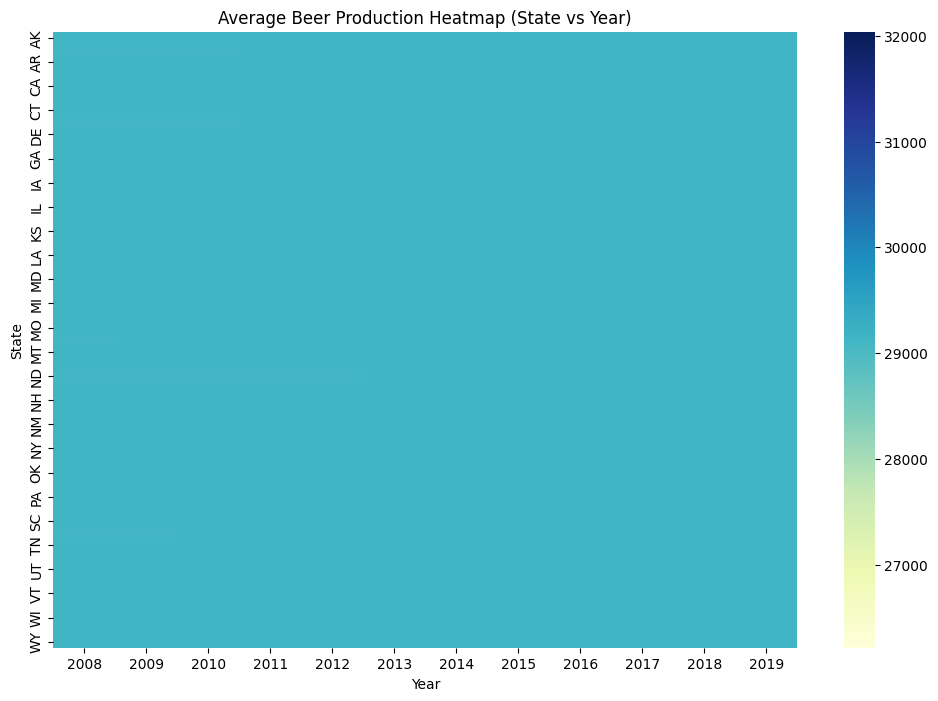

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(heat_data, cmap='YlGnBu')
plt.title('Average Beer Production Heatmap (State vs Year)')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

In [ ]:
# Visualise the trends in production for the most and least productive states

In [ ]:
import numpy as np

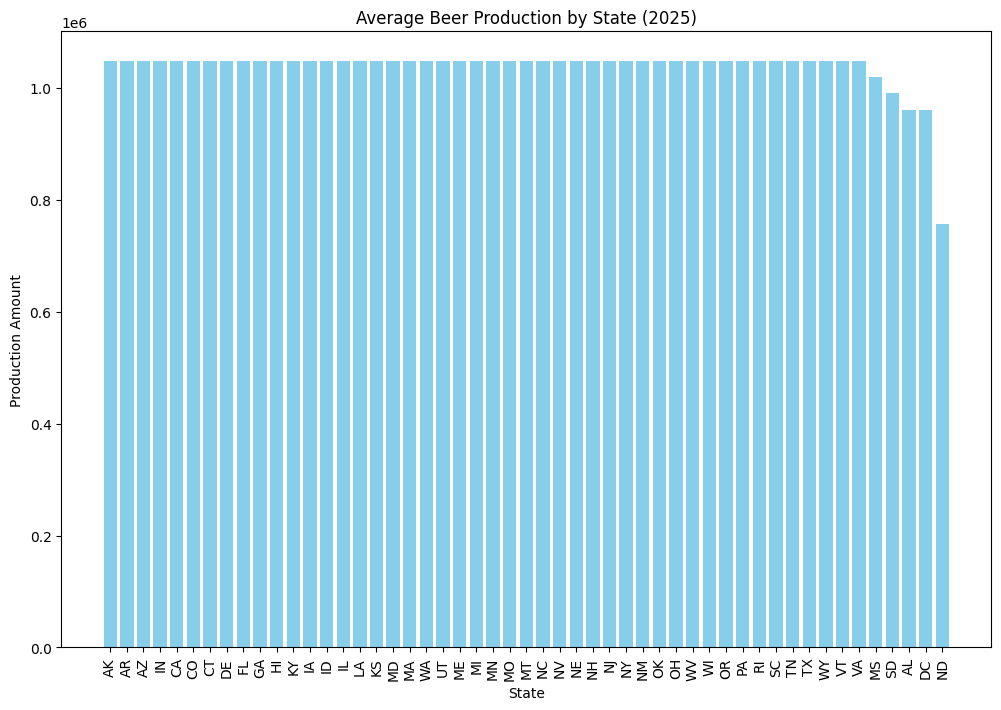

In [ ]:
plt.figure(figsize=(12, 8))

plt.bar(final_val['state'], final_val['barrels'], color='skyblue')

plt.title('Average Beer Production by State (2025)')
plt.xlabel('State')
plt.ylabel('Production Amount')
plt.xticks(rotation=90) # Rotates state names for readability
plt.show()

In [ ]:
# Calculate the average growth rates of the top and bottom states from the first year to the last year

In [ ]:
state_total=df1.groupby('state')['barrels'].sum().reset_index()


In [ ]:
##Top 5 states
top_5_states=state_total.sort_values(by='barrels',ascending=False).head(5).reset_index()
bottom_5_state=state_total.sort_values(by='barrels',ascending=True).head(5).reset_index()

In [ ]:
df1 = df1.sort_values(['state', 'year'])

In [ ]:
##Function to compute the growth
def growth_rate(group):
    first_year_value = group.iloc[0]['barrels']
    last_year_value = group.iloc[-1]['barrels']

    if first_year_value == 0:
        return None

    return (last_year_value - first_year_value) / first_year_value

In [ ]:
top_growth = (
    df1[df1['state'].isin(top_5_states['state'])]
    .groupby('state')
    .apply(growth_rate)
    .reset_index(name='growth_rate')
)

top_growth

/tmp/ipython-input-1794556153.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(growth_rate)


,state,growth_rate
0,AK,0.0
1,AR,0.0
2,AZ,0.0
3,CA,0.0
4,IN,0.0


In [ ]:
bottom_growth = (
    df1[df1['state'].isin(bottom_5_state['state'])]
    .groupby('state')
    .apply(growth_rate)
    .reset_index(name='growth_rate')
)
bottom_growth

/tmp/ipython-input-2324260574.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(growth_rate)


,state,growth_rate
0,AL,0.0
1,DC,0.0
2,MS,0.0
3,ND,0.0
4,SD,0.0


In [ ]:
##Analyse the trend of production types across years, irrespective of states. Identify which types are rising or declining or staying constant.

In [ ]:
# Analyse the overall trend of production by production types (cans/barrels etc.)

In [ ]:
trend_by_type=df1.groupby('type')['barrels'].sum().reset_index()
trend_by_type.sort_values(by='barrels',ascending=False)

,type,barrels
2,On Premises,17796383.15
1,Kegs and Barrels,17592496.60
0,Bottles and Cans,17534243.30


In [ ]:
##Now, for the top states, identify which types are rising across years and which are falling.

In [ ]:
# Identify which production types are growing and which are declining

In [ ]:
trend_type_year=df1.groupby(['state','type','year'])['barrels'].sum().reset_index()
trend_type_year.sort_values(by='barrels',ascending=False)

,state,type,year,barrels
1816,WY,On Premises,2019,29126.65
0,AK,Bottles and Cans,2008,29126.65
1,AK,Bottles and Cans,2009,29126.65
2,AK,Bottles and Cans,2010,29126.65
3,AK,Bottles and Cans,2011,29126.65
...,...,...,...,...
13,AK,Kegs and Barrels,2009,29126.65
12,AK,Kegs and Barrels,2008,29126.65
11,AK,Bottles and Cans,2019,29126.65
10,AK,Bottles and Cans,2018,29126.65


2.2 materials

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df2=pd.read_csv('/content/materials (1).csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1320 non-null   int64  
 1   data_type         1320 non-null   object 
 2   material_type     1320 non-null   object 
 3   year              1320 non-null   int64  
 4   month             1320 non-null   int64  
 5   type              1320 non-null   object 
 6   month_current     1320 non-null   int64  
 7   month_prior_year  1320 non-null   int64  
 8   ytd_current       1320 non-null   float64
 9   ytd_prior_year    1320 non-null   float64
dtypes: float64(2), int64(5), object(3)
memory usage: 103.3+ KB


Write below the type of variable, whether numerical or categorical and ordered or unordered, like you did for states:

1:data_type-categorical
2:material_type-categorical ordered
3:year-numerical ordered
4:month-month ordered
5:type-categorical unordered

In [ ]:
##Calculate the yearwise production of beer from the various types of materials (grain-based and non-grain-based).

In [ ]:
# Calculate the yearly production from grain and non grain materials

In [ ]:
yearly_production=df2.groupby(['year','material_type'])['ytd_current'].sum().reset_index()
yearly_production.sort_values(by='ytd_current',ascending=False).head(5)
#

,year,material_type,ytd_current
4,2008,Total Used,4.735061e+10
9,2009,Total Used,4.524148e+10
24,2012,Total Used,4.499869e+10
29,2013,Total Used,4.394441e+10
14,2010,Total Used,4.392527e+10


In [ ]:
##Calculate the yearwise production of beer from the various materials (Barley, Malt, Hops etc).

In [ ]:
# Calculate the yearly production from various ingredients

In [ ]:
yearly_type=df2.groupby(['year','type'])['ytd_current'].sum().reset_index()
yearly_type

,year,type,ytd_current
0,2008,Barley and barley products,3.689228e+08
1,2008,Corn and corn products,4.786971e+09
2,2008,Hops (dry),3.845065e+08
3,2008,Hops (used as extracts),4.538350e+07
4,2008,Malt and malt products,2.995794e+10
...,...,...,...
105,2017,Sugar and syrups,0.000000e+00
106,2017,Total Grain products,0.000000e+00
107,2017,Total Non-Grain products,0.000000e+00
108,2017,Total Used,0.000000e+00


In [ ]:
##Visualise the proportion of average production from various materials. Create one visualisation for grain vs non-grain and one for the individual materials like barley, malt, hops etc.

In [ ]:
average_production=df2.groupby('material_type')['ytd_current'].mean().reset_index()
average_production


,material_type,ytd_current
0,Grain Products,4.382324e+08
1,Non-Grain Products,1.216996e+08
2,Total Grain products,2.191162e+09
3,Total Non-Grain products,4.086616e+08
4,Total Used,2.599823e+09


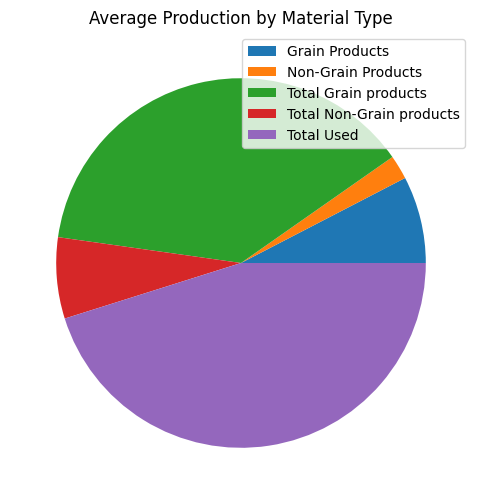

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(average_production['ytd_current'])
plt.legend(average_production['material_type'])
plt.title('Average Production by Material Type')
plt.show()
#

In [ ]:
production_by_type=df2.groupby(['year','type'])['ytd_current'].mean().reset_index()
production_by_type

,year,type,ytd_current
0,2008,Barley and barley products,3.074357e+07
1,2008,Corn and corn products,3.989143e+08
2,2008,Hops (dry),3.204221e+07
3,2008,Hops (used as extracts),3.781958e+06
4,2008,Malt and malt products,2.496495e+09
...,...,...,...
105,2017,Sugar and syrups,0.000000e+00
106,2017,Total Grain products,0.000000e+00
107,2017,Total Non-Grain products,0.000000e+00
108,2017,Total Used,0.000000e+00


What has changed in 10 years?
Create a visualisation to show trends in the use of materials in 2008 vs 2017. Show how the use of grains and non-grain based materials vary over months in 2008 and 2017.

In [ ]:
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
df2['month']=pd.Categorical(df2['month'],categories=month_order,ordered=True)

NameError: name 'pd' is not defined

In [ ]:
monthly_usage=df2.groupby(['year','month','material_type'])['month_current'].sum().reset_index()
monthly_usage

,year,month,material_type,month_current
0,2008,1,Grain Products,509108844
1,2008,1,Non-Grain Products,83486670
2,2008,1,Total Grain products,509108844
3,2008,1,Total Non-Grain products,84778285
4,2008,1,Total Used,593887129
...,...,...,...,...
595,2017,12,Grain Products,13878747
596,2017,12,Non-Grain Products,1491354
597,2017,12,Total Grain products,13878747
598,2017,12,Total Non-Grain products,2148660


In [ ]:
pivot_usage = monthly_usage.pivot_table(
    index='month',
    columns=['year', 'material_type'],
    values='month_current',

)

pivot_usage

year                    2008                                          \
material_type Grain Products Non-Grain Products Total Grain products   
month                                                                  
1                509108844.0         83486670.0          509108844.0   
2                485740033.0         82480703.0          485740033.0   
3                542124232.0         86170102.0          542124232.0   
4                528822235.0         88567501.0          528822235.0   
5                556829993.0         97962314.0          556829993.0   
6                562595645.0         88887493.0          562595645.0   
7                551513032.0         78996377.0          551513032.0   
8                530698060.0         90297570.0          530698060.0   
9                494237495.0         76108840.0          494237495.0   
10               480715200.0         46955322.0          480715200.0   
11               434602496.0         48228547.0          434602496.0   
12               437878833.0         40801237.0          437878833.0   

year                                                          2009  \
material_type Total Non-Grain products   Total Used Grain Products   
month                                                                
1                           84778285.0  593887129.0    487497569.0   
2                           84079822.0  569819855.0    465066900.0   
3                           88381312.0  630505544.0    519952416.0   
4                           89900108.0  618722343.0    519749430.0   
5                           99766470.0  656596463.0    526467792.0   
6                           91334066.0  653929711.0    518043738.0   
7                           80434347.0  631947379.0    520121272.0   
8                           91961741.0  622659801.0    486710695.0   
9                           77841538.0  572079033.0    492729828.0   
10                          48523784.0  529238984.0    448685527.0   
11                          49476337.0  484078833.0    411658993.0   
12                          42375693.0  480254526.0    409132331.0   

year                                                   \
material_type Non-Grain Products Total Grain products   
month                                                   
1                     69620187.0          487497569.0   
2                     74322776.0          465066900.0   
3                     77200703.0          519952416.0   
4                     77304366.0          519749430.0   
5                     82513986.0          526467792.0   
6                     76798887.0          518043738.0   
7                     72445146.0          520121272.0   
8                     67071179.0          486710695.0   
9                     55546930.0          492729828.0   
10                    49469648.0          448685527.0   
11                    49658560.0          411658993.0   
12                    43226718.0          409132331.0   

year                                                 ...           2016  \
material_type Total Non-Grain products   Total Used  ... Grain Products   
month                                                ...                  
1                           71044188.0  558541757.0  ...     15008923.0   
2                           75262633.0  540329533.0  ...     13114273.0   
3                           83805360.0  603757776.0  ...     21194545.0   
4                           83473844.0  603223274.0  ...     11664730.0   
5                           89429317.0  615897109.0  ...     10818592.0   
6                           83015500.0  601059238.0  ...     18742001.0   
7                           85813839.0  605935111.0  ...     12520034.0   
8                           77387033.0  564097728.0  ...     11498974.0   
9                           66797376.0  559527204.0  ...     17895210.0   
10                          58414163.0  507099690.0  ...     10941002.0   
11                          59574129.

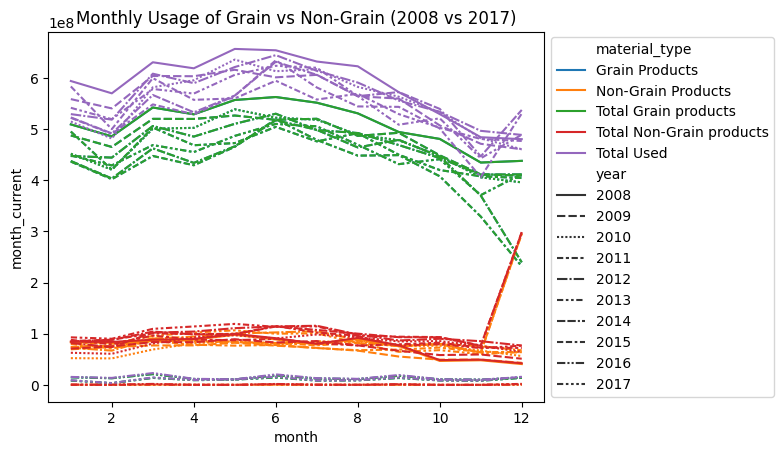

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data=monthly_usage,
    x='month',
    y='month_current',
    hue='material_type',
    style='year'
)
plt.title('Monthly Usage of Grain vs Non-Grain (2008 vs 2017)')
plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.show()

Now, for the above visualisation, instead of simply using production quantity, use the difference in current month's production and the production in current month in the prior year.

How did 2008 perform compared to 2007? What about 2017 compared to 2016?

In [ ]:
monthly_usage=monthly_usage.sort_values(by=['material_type','year','month'])

In [ ]:
monthly_usage['YoY_change']=monthly_usage.groupby(['material_type','year'])['month_current'].diff()
monthly_usage
#

,year,month,material_type,month_current,YoY_change
0,2008,1,Grain Products,509108844,NaN
5,2008,2,Grain Products,485740033,-23368811.0
10,2008,3,Grain Products,542124232,56384199.0
15,2008,4,Grain Products,528822235,-13301997.0
20,2008,5,Grain Products,556829993,28007758.0
...,...,...,...,...,...
579,2017,8,Total Used,9221394,484100.0
584,2017,9,Total Used,14555109,5333715.0
589,2017,10,Total Used,8993015,-5562094.0
594,2017,11,Total Used,8542523,-450492.0


In [ ]:
compare_df = monthly_usage[
    monthly_usage['year'].isin([2008, 2017])
]

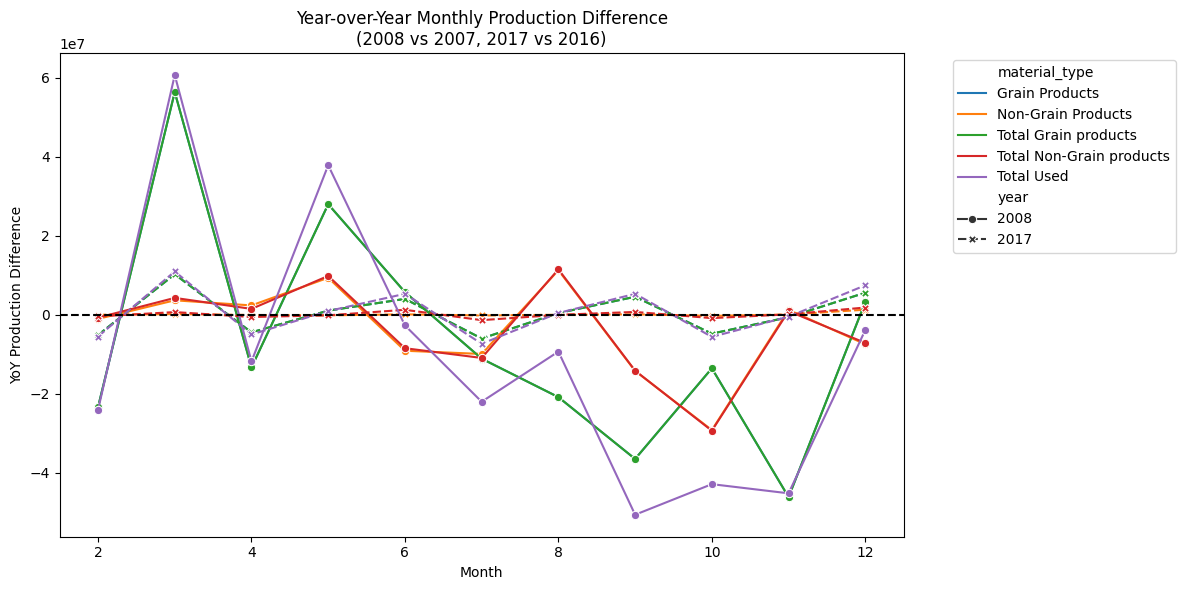

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(
    data=compare_df,
    x='month',
    y='YoY_change',
    hue='material_type',
    style='year',
    markers=True
)

plt.axhline(0, color='black', linestyle='--')
plt.title('Year-over-Year Monthly Production Difference\n(2008 vs 2007, 2017 vs 2016)')
plt.xlabel('Month')
plt.ylabel('YoY Production Difference')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

2.3 brewers

In [ ]:
df3=pd.read_csv('/content/brewers (1).csv')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        126 non-null    int64  
 1   year              126 non-null    int64  
 2   brewer_size       126 non-null    object 
 3   n_of_brewers      126 non-null    int64  
 4   total_barrels     126 non-null    float64
 5   taxable_removals  126 non-null    float64
 6   total_shipped     126 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 7.0+ KB


2.3.0 [3 marks]
Write below the type of variable, whether numerical or categorical and ordered or unordered, like you did previously:

1:Year=Integer and Ordered
2:brewer_size=Integer and Unordered
3:n_of_brewers=String and Unordered
4:Total_barrels=Float Ordered
5:Total_shipped=float Ordered

In [ ]:
##Analyze the distribution of brewers by size over time. Are small or large brewers more prevalent in specific years?

In [ ]:
brewer_distribution_by_size=df3.groupby(['year','brewer_size'])['n_of_brewers'].sum().reset_index()
brewer_distribution_by_size

,year,brewer_size,n_of_brewers
0,2009,"1 to 1,000 Barrels",1037
1,2009,"1,000,001 to 6,000,000 Barrels",4
2,2009,"1,001 to 7,500 Barrels",357
3,2009,"100,001 to 500,000 Barrels",27
4,2009,"15,001 to 30,000 Barrels",40
...,...,...,...
120,2019,"500,001 to 1,000,000 Barrels",12
121,2019,"6,000,001 Barrels and Over",15
122,2019,"60,001 to 100,000 Barrels",33
123,2019,"7,501 to 15,000 Barrels",159


In [ ]:
##How does their contribution to total beer production change over time?

In [ ]:
# Analyse the contribution of different brewer sizes to the total production over the years

In [ ]:
contribution_size_year=df3.groupby(['brewer_size','year'])['total_barrels'].sum().reset_index()
contribution_size_year

,brewer_size,year,total_barrels
0,"1 to 1,000 Barrels",2009,2518394.31
1,"1 to 1,000 Barrels",2010,2518394.31
2,"1 to 1,000 Barrels",2011,2518394.31
3,"1 to 1,000 Barrels",2012,2518394.31
4,"1 to 1,000 Barrels",2013,2518394.31
...,...,...,...
120,Under 1 Barrel,2016,2518394.31
121,Under 1 Barrel,2017,2518394.31
122,Under 1 Barrel,2018,2518394.31
123,Under 1 Barrel,2019,5036788.62


In [ ]:
##Investigate the correlation between brewer size and taxable removals. Do larger brewers produce more taxable beer compared to smaller brewers? Also find the correlation value.

In [ ]:
# Find correlation between brewer size and taxable removals
# Note that brewer size is categorical

In [ ]:
avg_removals = (
    df3
    .groupby('brewer_size')['taxable_removals']
    .mean()
    .reset_index()
)

avg_removals

,brewer_size,taxable_removals
0,"1 to 1,000 Barrels",7.128686e+05
1,"1,000,000 to 6,000,000 Barrels",1.477715e+07
2,"1,000,001 to 1,999,999 Barrels",6.345388e+06
3,"1,000,001 to 6,000,000 Barrels",9.592723e+06
4,"1,001 to 7,500 Barrels",1.883647e+06
5,"100,001 to 500,000 Barrels",6.769882e+06
6,"15,001 to 30,000 Barrels",1.239770e+06
7,"2,000,000 to 6,000,000 Barrels",1.840745e+07
8,"30,001 to 60,000 Barrels",1.956428e+06
9,"500,001 to 1,000,000 Barrels",5.095738e+06


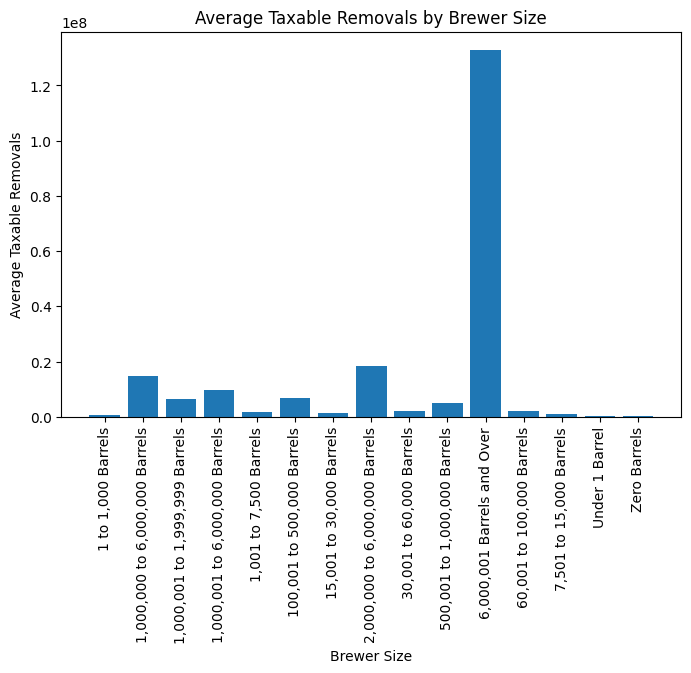

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(avg_removals['brewer_size'], avg_removals['taxable_removals'])
plt.title('Average Taxable Removals by Brewer Size')
plt.xlabel('Brewer Size')
plt.ylabel('Average Taxable Removals')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Visualise the trends in quantities of shipped beer across different brewer sizes

In [ ]:
quantity_shipped=df3.groupby('brewer_size')['total_shipped'].sum().reset_index()
quantity_shipped

,brewer_size,total_shipped
0,"1 to 1,000 Barrels",13837.0
1,"1,000,000 to 6,000,000 Barrels",37401.0
2,"1,000,001 to 1,999,999 Barrels",625228.0
3,"1,000,001 to 6,000,000 Barrels",14548.0
4,"1,001 to 7,500 Barrels",67762.0
5,"100,001 to 500,000 Barrels",2580630.0
6,"15,001 to 30,000 Barrels",337832.0
7,"2,000,000 to 6,000,000 Barrels",5217343.0
8,"30,001 to 60,000 Barrels",495163.0
9,"500,001 to 1,000,000 Barrels",472025.0


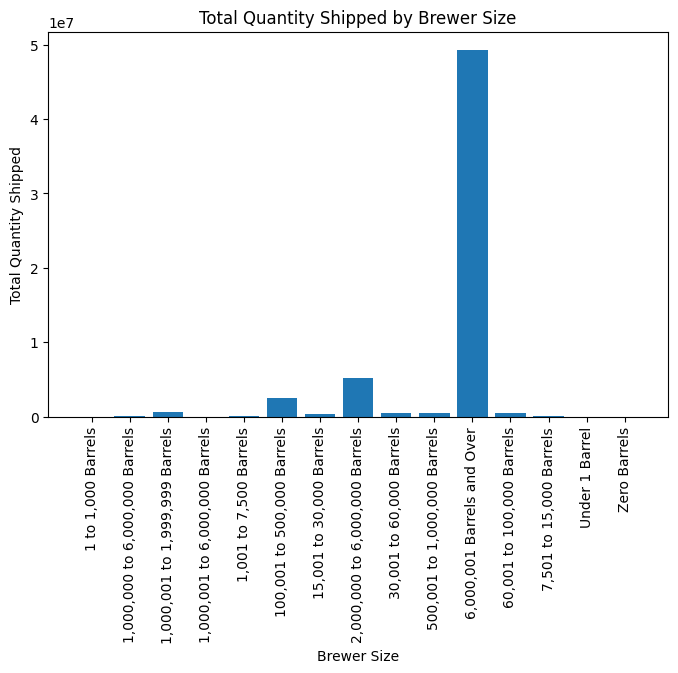

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(quantity_shipped['brewer_size'], quantity_shipped['total_shipped'])
plt.title('Total Quantity Shipped by Brewer Size')
plt.xlabel('Brewer Size')
plt.ylabel('Total Quantity Shipped')
plt.xticks(rotation=90)
plt.show()

In [ ]:
##Can you connect consumption with shipped and taxed beer? What did you find out about the distribution of brewers based on their size in the USA?

In [ ]:
shipped_consumption=df3.groupby('brewer_size')[['total_shipped','total_barrels']].sum().reset_index()
shipped_consumption
#

,brewer_size,total_shipped,total_barrels
0,"1 to 1,000 Barrels",13837.0,27702337.41
1,"1,000,000 to 6,000,000 Barrels",37401.0,2518394.31
2,"1,000,001 to 1,999,999 Barrels",625228.0,22665548.79
3,"1,000,001 to 6,000,000 Barrels",14548.0,2518394.31
4,"1,001 to 7,500 Barrels",67762.0,27702337.41
5,"100,001 to 500,000 Barrels",2580630.0,27702337.41
6,"15,001 to 30,000 Barrels",337832.0,27702337.41
7,"2,000,000 to 6,000,000 Barrels",5217343.0,22665548.79
8,"30,001 to 60,000 Barrels",495163.0,27702337.41
9,"500,001 to 1,000,000 Barrels",472025.0,27702337.41
